<a href="https://colab.research.google.com/github/Joshitha-03/Calculator/blob/master/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Dataset09-Employee-salary-prediction.csv to Dataset09-Employee-salary-prediction.csv


In [8]:
sal_data = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
sal_data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
sal_data.shape

(375, 6)

In [10]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [11]:
sal_data.columns= ['Age','Gender','Degree','JOb_Title','Experience_years','Salary']

In [12]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
JOb_Title,object
Experience_years,float64
Salary,float64


In [13]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   JOb_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [14]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,JOb_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [15]:
sal_data1= sal_data.drop_duplicates(keep='first')

In [16]:
sal_data1.isnull().sum()

,0
Age,1
Gender,1
Degree,1
JOb_Title,1
Experience_years,1
Salary,1


In [17]:
sal_data1.dropna(how= 'any',inplace=True)

/tmp/ipython-input-17-3470955758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how= 'any',inplace=True)


In [18]:
sal_data1.head()

,Age,Gender,Degree,JOb_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [19]:
sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [20]:
corr= sal_data1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

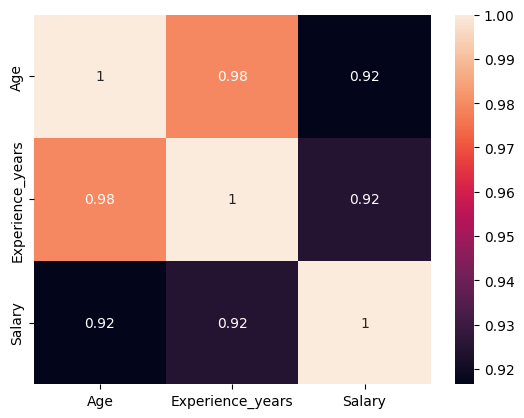

In [21]:
sns.heatmap(corr,annot= True)

In [22]:
sal_data1['Degree'].value_counts()

,count
Degree,
Bachelor's,191
Master's,91
PhD,42


<Axes: xlabel='Degree'>

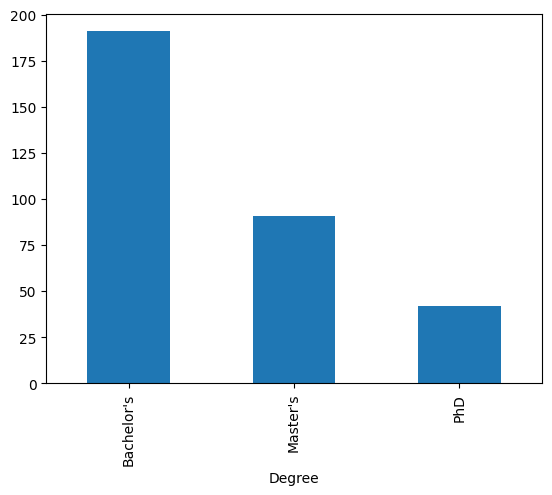

In [23]:
sal_data1['Degree'].value_counts().plot(kind='bar')

In [24]:
sal_data1['JOb_Title'].value_counts()

,count
JOb_Title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Data Scientist,6
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


<Axes: ylabel='Gender'>

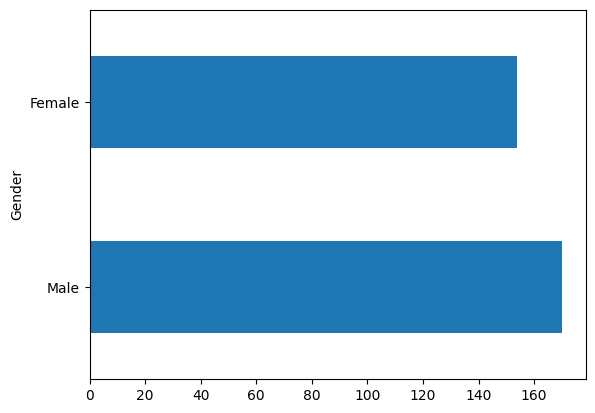

In [25]:
sal_data1['Gender'].value_counts().plot(kind='barh')

<Axes: ylabel='Frequency'>

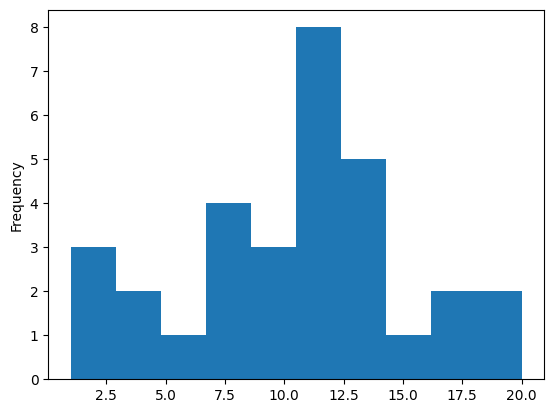

In [26]:
sal_data1['Age'].value_counts().plot(kind='hist')

<Axes: >

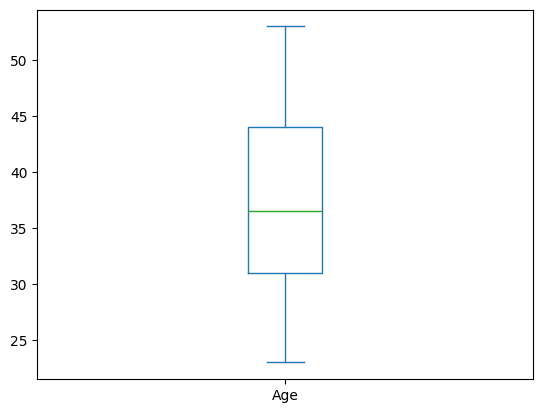

In [27]:
sal_data1['Age'].plot(kind='box')

In [28]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder= LabelEncoder()

In [29]:
sal_data1['Gender_Encode']=Label_Encoder.fit_transform(sal_data1['Gender'])

/tmp/ipython-input-29-1708347298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode']=Label_Encoder.fit_transform(sal_data1['Gender'])


In [30]:
sal_data1['Degree_Encode']=Label_Encoder.fit_transform(sal_data1['Degree'])

/tmp/ipython-input-30-742768987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode']=Label_Encoder.fit_transform(sal_data1['Degree'])


In [31]:
sal_data1['Job_Title_Encode']=Label_Encoder.fit_transform(sal_data1['JOb_Title'])

/tmp/ipython-input-31-1966904829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode']=Label_Encoder.fit_transform(sal_data1['JOb_Title'])


In [32]:
sal_data1.head()

,Age,Gender,Degree,JOb_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [33]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()

In [34]:
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years_scaled']= std_scaler.fit_transform(sal_data1[['Experience_years']])

/tmp/ipython-input-34-3013600527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
/tmp/ipython-input-34-3013600527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_years_scaled']= std_scaler.fit_transform(sal_data1[['Experience_years']])


In [35]:
sal_data1.head()

,Age,Gender,Degree,JOb_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [36]:
X= sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_years_scaled']]
y= sal_data1['Salary']

In [37]:
X.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [40]:
x_train.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
73,-1.307742,1,0,166,-1.213615
182,0.922302,0,2,155,0.744158
17,0.225413,1,2,116,0.292364
24,0.504169,1,1,37,0.442962
146,0.643547,0,2,115,0.894756


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
Linear_regression_model= LinearRegression()

In [43]:
Linear_regression_model.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [45]:
df= pd.DataFrame({'y_Actual': y_test,'y_Predicted':y_pred_lr})
df['Error']= df['y_Actual']- df['y_Predicted']
df['abs_error']= abs(df['Error'])
Mean_absolute_Error= df['abs_error'].mean()
Mean_absolute_Error

np.float64(10570.78640113617)

In [46]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
r2_score(y_test, y_pred_lr)

0.8911231066517089

In [48]:
print(f'Accurracy of the model ={ round(r2_score(y_test,y_pred_lr),4)*100}%')

Accurracy of the model =89.11%


In [49]:
sal_data1.head()

,Age,Gender,Degree,JOb_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [50]:
Age1= std_scaler.transform([[49]])
Age=  5.86448677
Gender=0
Degree= 2
Job_Title= 22
Experiences_years1= std_scaler.transform([[15]])
Experience_years=0.74415815
#Find the salary=?

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
std_scaler.transform([[15]])[0][0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(0.7441581452572275)

In [52]:
Emp_Salary= Linear_regression_model.predict([[Age,Gender,Degree,Job_Title,Experience_years]])
Emp_Salary

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249925.15061728])

In [53]:
print("Salary of that employee with above attributes = ",Emp_Salary[0])

Salary of that employee with above attributes =  249925.15061727556


Linear Regression R2 Score: 0.8911231066517089
Logistic Regression Accuracy: 0.2
KNN Accuracy: 0.12307692307692308


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC Accuracy: 0.15384615384615385
Random Forest Accuracy: 0.27692307692307694
Gradient Boosting Accuracy: 0.23076923076923078


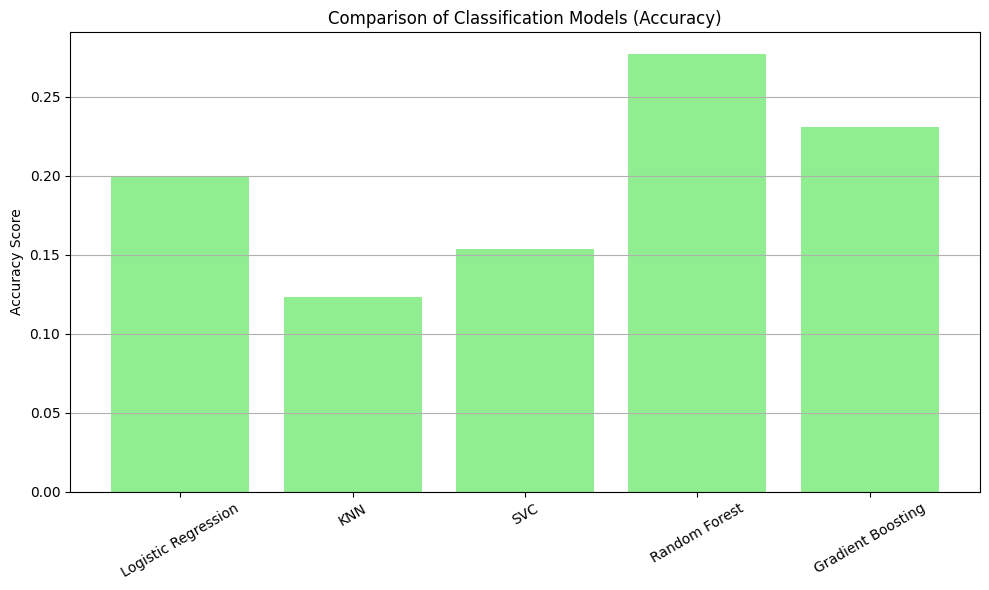

In [54]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
lr_preds = lr_model.predict(x_test)

lr_r2 = r2_score(y_test, lr_preds)
print("Linear Regression R2 Score:", lr_r2)

# -------------------- Logistic Regression --------------------
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
log_preds = log_model.predict(x_test)
log_acc = accuracy_score(y_test, log_preds)
print("Logistic Regression Accuracy:", log_acc)

# -------------------- K-Nearest Neighbors --------------------
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_preds = knn_model.predict(x_test)
knn_acc = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_acc)

# -------------------- Support Vector Classifier --------------------
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_preds = svc_model.predict(x_test)
svc_acc = accuracy_score(y_test, svc_preds)
print("SVC Accuracy:", svc_acc)

# -------------------- Random Forest Classifier --------------------
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)

# -------------------- Gradient Boosting Classifier --------------------
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
gb_preds = gb_model.predict(x_test)
gb_acc = accuracy_score(y_test, gb_preds)
print("Gradient Boosting Accuracy:", gb_acc)

# -------------------- Accuracy Comparison --------------------
model_names = ['Logistic Regression', 'KNN', 'SVC', 'Random Forest', 'Gradient Boosting']
accuracy_values = [log_acc, knn_acc, svc_acc, rf_acc, gb_acc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='lightgreen')
plt.title('Comparison of Classification Models (Accuracy)')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
